First we need to install miniconda in the colab environment to be able to run python backend for tensorflow. This and the following cell will take about a minute each to run and needs to be done everytime you connect to colab.

In [1]:
install.packages('reticulate')
reticulate::install_miniconda()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘here’, ‘png’


* Downloading 'https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh' ...

* Installing Miniconda -- please wait a moment ...

* Miniconda has been successfully installed at '/root/.local/share/r-miniconda'.



[1] "/root/.local/share/r-miniconda"

Then we can install the r-packages we need (modify as necessary)

In [2]:
install.packages('tensorflow')
install.packages('keras')
install.packages("remotes")
remotes::install_github("MansMeg/IntroML",
subdir = "rpackage")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘config’, ‘tfruns’, ‘tfautograph’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zeallot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




backports (1.3.0 -> 1.4.0) [CRAN]
checkmate (NA    -> 2.0.0) [CRAN]


Installing 2 packages: backports, checkmate

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpJHdvma/remotes3c54b28fe/MansMeg-IntroML-429b921/rpackage/DESCRIPTION’
─  preparing ‘uuml’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘uuml_0.2.1.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Once the tensorflow and keras r-packages are installed we can run the `install_tensorflow()` command to install tensorflow.

In [3]:
library('tensorflow')
install_tensorflow()


Installation complete.



Finally we can run some r-code to make sure everything works

Loaded Tensorflow version 2.7.0



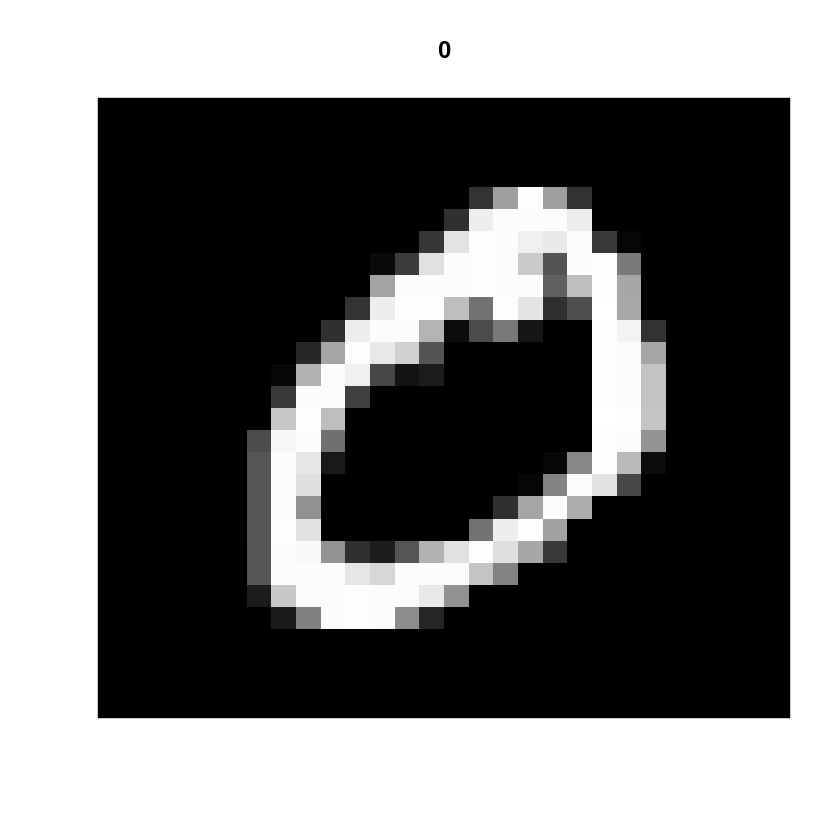

In [4]:
library(tensorflow)
library(keras)
mnist <- dataset_mnist()

idx <- 2
im <- mnist$train$x[idx,,]
# Transpose the image
im <- t(apply(im, 2, rev))
image(1:28, 1:28, im, col=gray((0:255)/255), xlab = "", ylab = "",
xaxt='n', yaxt='n', main=paste(mnist$train$y[idx]))

And run the example from https://tensorflow.rstudio.com/tutorials/beginners/ to make sure model training works

Note! Currently this notebook won't output anything during training so we have to `plot(history)`

In [5]:
mnist$train$x <- mnist$train$x/255
mnist$test$x <- mnist$test$x/255

model <- keras_model_sequential() %>% 
  layer_flatten(input_shape = c(28, 28)) %>% 
  layer_dense(units = 16, activation = "sigmoid") %>% 
  layer_dense(10, activation = "softmax")

  summary(model)

  model %>% 
  compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics = "accuracy"
  )

  history <- model %>% 
  fit(
    x = mnist$train$x, y = mnist$train$y,
    epochs = 5,
    validation_split = 0.3,
    verbose = 2
  )

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 flatten (Flatten)                  (None, 784)                     0           
                                                                                
 dense_1 (Dense)                    (None, 16)                      12560       
                                                                                
 dense (Dense)                      (None, 10)                      170         
                                                                                
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
________________________________________________________________________________


`geom_smooth()` using formula 'y ~ x'



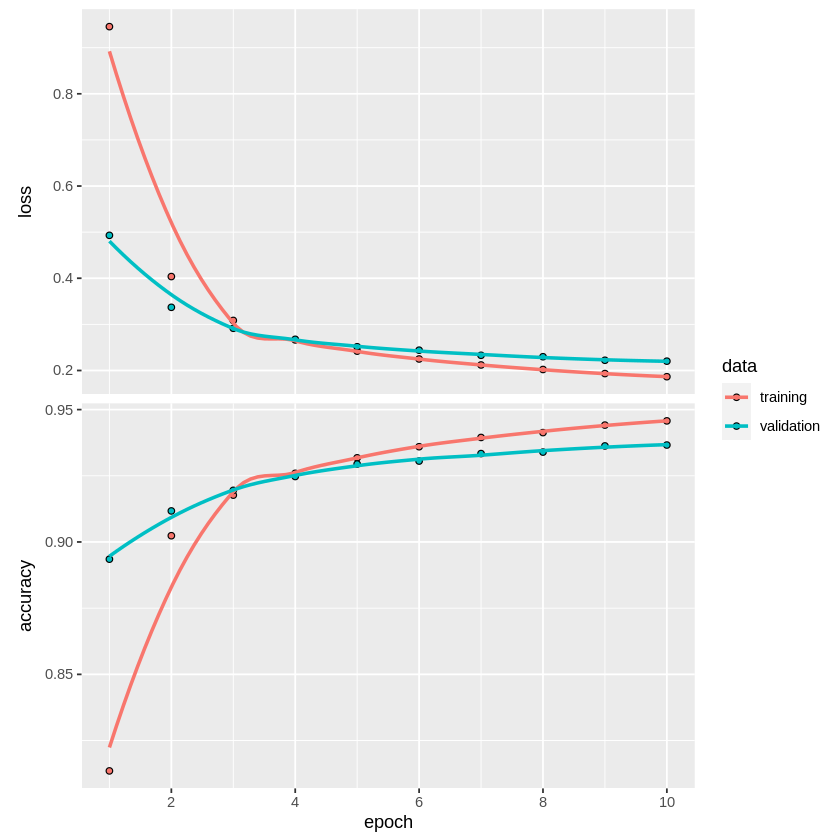

In [6]:
plot(history)